In [72]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage, misc
from scipy.linalg import toeplitz
import matplotlib.image as mpimg
np.set_printoptions(threshold=np.inf)
np.set_printoptions(precision=0)
np.set_printoptions(suppress=True)

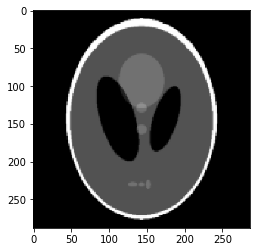

In [73]:
img=mpimg.imread('phantom_test.png')
img = img[:,:,1]
img = np.abs(1-img)
imgplot = plt.imshow(img, cmap='Greys')
#plt.plot(750,750, "ro")
plt.show()


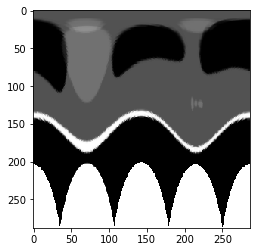

In [138]:
[nx, ny] = img.shape
origin = [nx//2, ny//2]
x, y = np.meshgrid(np.arange(nx), np.arange(ny))
x = x - origin[0]
y = y - origin[1]
r = np.sqrt(x**2 + y**2)
theta = np.arctan2(y, x)
r_i = np.linspace(r.min(), r.max(), nx)
theta_i = np.linspace(theta.min(), theta.max(), ny)
theta_grid, r_grid = np.meshgrid(theta_i, r_i)
xi = r_grid * np.cos(theta_grid)
yi = r_grid * np.sin(theta_grid)

xi = xi + origin[0]
yi = yi + origin[1]


xi, yi = xi.flatten(), yi.flatten()
coords = np.vstack((xi, yi))
zi = sp.ndimage.map_coordinates(img.T, coords, order=1)
newimg = zi.reshape((nx, ny))

imgplot = plt.imshow(newimg, cmap='Greys')
plt.show()

4 2
(72, 144)
288
(288, 287)


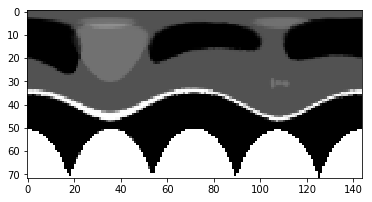

In [75]:
da = int(newimg.shape[0]/64)
dt = int(newimg.shape[1]/120)
print(da, dt)
newimg2 = newimg[0::da, 0::dt]
print(newimg2.shape)
print(len(img))
print(img.shape)

imgplot = plt.imshow(newimg2, cmap='Greys')
plt.show()

(1, 287) (287, 287)


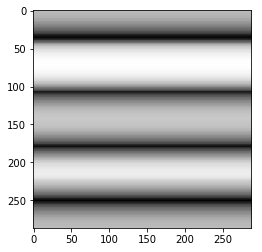

In [101]:
l = newimg.shape[0]
w = newimg.shape[1]
R = np.zeros((w,l))
rim = newimg
c1 = rim[-1::]
c2 = rim[:-1:]
print(c1.shape, c2.shape)
for i in range(newimg.shape[0]):
    rim = np.concatenate( (rim[-1::], rim[:-1:]), axis=0)
    R[:,i] = sum(rim)
    
imgplot = plt.imshow(R, cmap='Greys')
plt.show()

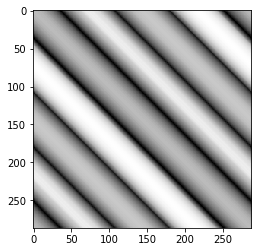

In [126]:
l = newimg.shape[0]
w = newimg.shape[1]
R = np.zeros((w,l))
rim = newimg
for i in range(newimg.shape[0]):
    c1 = rim[:,-1:]
    c2 = np.delete(rim, -1, axis=1)
    rim = np.concatenate( (c1, c2), axis=1)
    R[:,i] = sum(rim)
    
imgplot = plt.imshow(R, cmap='Greys')
plt.show()

In [ ]:
rim = np.random.rand(4,4)*10
print(rim)
c1 = rim[:,-1:]
c2 = np.delete(rim, -1, axis=1)
rim2 = np.concatenate((c1, c2), axis=1)

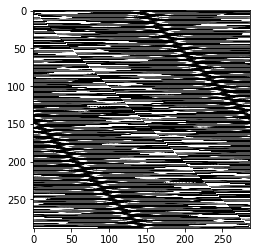

In [143]:
x, y = np.meshgrid(np.arange(nx), np.arange(ny))
x = x - origin[0]
y = y - origin[1]

xi = x * np.cos(y)
yi = x * np.sin(y)

r_i = np.linspace(r.min(), r.max(), nx)
theta_i = np.linspace(theta.min(), theta.max(), ny)
theta_grid, r_grid = np.meshgrid(theta_i, r_i)

r = np.sqrt(r_grid**2 + theta_grid**2)
theta = np.arctan2(theta_grid, r_grid)


xi = xi + origin[0]
yi = yi + origin[1]


xi, yi = xi.flatten(), yi.flatten()
coords = np.vstack((xi, yi))
zi = sp.ndimage.map_coordinates(newimg.T, coords, order=1)
newimg3 = zi.reshape((nx, ny))

imgplot = plt.imshow(newimg3, cmap='Greys')
plt.show()